In [22]:
import pandas as pd
import os
import time
import datetime
import plotly.express as px
PROJECT_DIR = f'./2_removed_empty/0'
recordings = sorted(os.listdir(PROJECT_DIR))
for i,recording in enumerate(recordings):
    RECORDING_DIR = f'{PROJECT_DIR}/{recording}'
    fs = 100
    acceleration = pd.read_csv(f'{RECORDING_DIR}/acceleration.csv',skiprows=1)
    gyroscope = pd.read_csv(f'{RECORDING_DIR}/gyroscope.csv',skiprows=1)
    length_samples = len(acceleration)
    length_seconds = length_samples/fs
    length_minutes = length_seconds/60
    length_hours = length_minutes/60
    print(i,'----',recording,'----',f'{length_hours:.2f} hours')

0 ---- 2024-01-06_15_13_55 ---- 0.07 hours
1 ---- 2024-01-06_20_14_14 ---- 0.13 hours
2 ---- 2024-01-08_15_18_08 ---- 0.13 hours
3 ---- 2024-02-07_11_40_49 ---- 0.37 hours
4 ---- 2024-02-07_16_02_36 ---- 0.16 hours
5 ---- 2024-02-12_11_00_52 ---- 0.10 hours
6 ---- 2024-02-12_16_01_14 ---- 0.11 hours
7 ---- 2024-02-13_18_00_28 ---- 0.10 hours
8 ---- 2024-02-14_11_07_00 ---- 0.19 hours
9 ---- 2024-02-14_16_02_43 ---- 0.12 hours


In [29]:
import json

In [40]:
with open(f'{PROJECT_DIR}/2024-01-06_15_13_55/labels.json','r') as f:
    labels = json.load(f)

In [41]:
labels

{'left': {'water': [{'start': 455, 'end': 1075}, {'start': 1411, 'end': 1873}],
  'listerine': [{'start': 5780, 'end': 6268}]},
 'right': {}}

In [52]:
import numpy as np
label_vector = np.zeros(len(acceleration))
for gesture in labels['left']['water']:
    label_vector[gesture['start']:gesture['end']] = 10
for gesture in labels['left']['listerine']:
    label_vector[gesture['start']:gesture['end']] = 20

In [53]:
acceleration = pd.read_csv(f'{PROJECT_DIR}/2024-01-06_15_13_55/acceleration.csv',skiprows=1)

In [54]:
acceleration['label'] = label_vector

In [55]:
acceleration['label'].value_counts()

0.0     24804
10.0     1082
20.0      488
Name: label, dtype: int64

In [56]:
fig = px.line(data_frame=acceleration,y=['x','y','z','label'])
fig.show(renderer='browser')

In [66]:
acceleration
import torch
torch.save(torch.from_numpy(acceleration.values).float(),'0.pt')

In [58]:
gyroscope = pd.read_csv(f'{PROJECT_DIR}/2024-01-06_15_13_55/gyroscope.csv',skiprows=1)

In [59]:
gyroscope

,timestamp,x,y,z
0,40805186298,0.511905,0.753807,0.114843
1,40814758826,0.531453,0.704938,0.108734
2,40824131850,0.513127,0.679282,0.199142
3,40833689642,0.312763,0.581543,0.377515
4,40843247418,0.130725,0.502131,0.498466
...,...,...,...,...
26357,292700094183,-2.861292,1.419650,-2.342056
26358,292709648065,-2.583959,1.534493,-2.228435
26359,292719204545,-2.162462,1.481958,-1.991420
26360,292728760897,-1.841147,1.508837,-1.955990


In [ ]:

fig = px.line(data_frame=acceleration,x='timestamp',y=['x','y','z'])
fig.show(renderer='browser')

<Axes: >

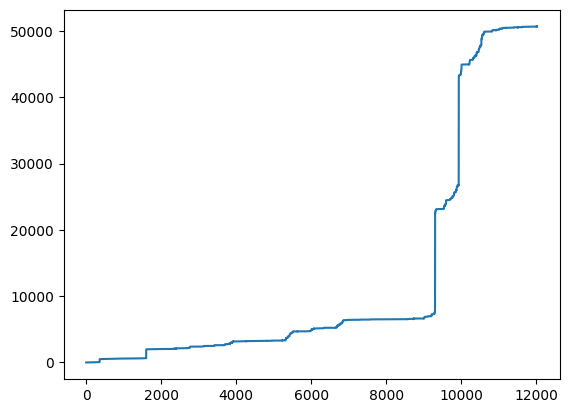

In [29]:
((acceleration.timestamp - acceleration.timestamp[0]) / 1e9).plot()

<Axes: >

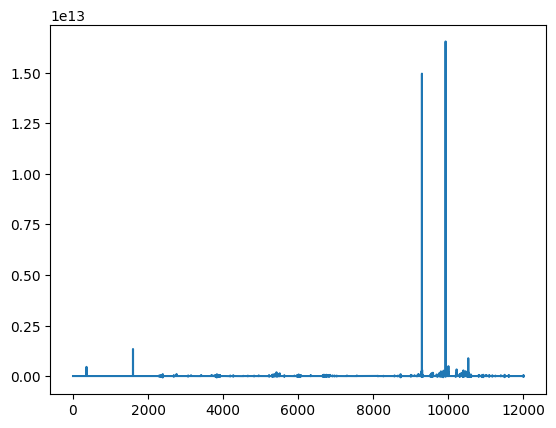

In [24]:
acceleration.timestamp.diff().plot()

In [2]:
PROJECT_DIR = f'./ticwatch_e3_0178/files'
recordings = sorted(os.listdir(PROJECT_DIR))
for recording in recordings:
    RECORDING_DIR = f'{PROJECT_DIR}/{recording}'
    fs = 100
    acceleration = pd.read_csv(f'{RECORDING_DIR}/acceleration.csv',skiprows=1)
    gyroscope = pd.read_csv(f'{RECORDING_DIR}/gyroscope.csv',skiprows=1)
    length_samples = len(acceleration)
    length_seconds = length_samples/fs
    length_minutes = length_seconds/60
    length_hours = length_minutes/60
    print('----',recording,'----',f'{length_hours:.2f} hours')

---- 2023-01-10_08_31_59 ---- 0.00 hours
---- 2023-01-10_08_44_48 ---- 0.00 hours
---- 2023-01-10_12_07_53 ---- 0.16 hours
---- 2023-01-12_11_38_20 ---- 0.16 hours
---- 2023-01-13_09_36_52 ---- 0.10 hours
---- 2023-01-14_16_35_51 ---- 0.11 hours
---- 2023-01-15_09_42_10 ---- 0.19 hours
---- 2023-01-17_12_06_33 ---- 0.10 hours
---- 2023-01-19_11_41_20 ---- 0.36 hours
---- 2023-01-19_17_40_51 ---- 0.06 hours
---- 2023-01-19_17_44_12 ---- 0.06 hours
---- 2023-01-20_09_37_06 ---- 0.10 hours
---- 2023-01-22_09_43_07 ---- 0.11 hours


In [22]:
acceleration = pd.read_csv(f'{PROJECT_DIR}/{recordings[11]}/acceleration.csv',skiprows=1)
fig = px.line(data_frame=acceleration,y=['x','y','z'])
fig.show(renderer='browser')